In [20]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()
X, y = data.data, data.target
df = pd.DataFrame(X, columns=data.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

pca = PCA(n_components=X_train.shape[1])
pca_transform = pca.fit_transform(scaled_X_train)

In [22]:
pca.explained_variance_ratio_

array([4.36893153e-01, 1.94151626e-01, 9.66154484e-02, 6.71661075e-02,
       5.49883033e-02, 4.01225718e-02, 2.18306816e-02, 1.48922601e-02,
       1.37410827e-02, 1.10137130e-02, 1.04826288e-02, 9.16214247e-03,
       7.66306051e-03, 5.14226331e-03, 3.19635178e-03, 2.51968451e-03,
       1.92415148e-03, 1.65844223e-03, 1.49026749e-03, 1.06777316e-03,
       1.01725216e-03, 8.48954816e-04, 7.43492725e-04, 5.81295611e-04,
       5.44222785e-04, 2.53545469e-04, 2.14385701e-04, 4.62967124e-05,
       2.51158320e-05, 3.72534805e-06])

In [23]:
proportion_explained = np.cumsum(pca.explained_variance_ratio_)
print(proportion_explained)

[0.43689315 0.63104478 0.72766023 0.79482633 0.84981464 0.88993721
 0.91176789 0.92666015 0.94040123 0.95141495 0.96189758 0.97105972
 0.97872278 0.98386504 0.98706139 0.98958108 0.99150523 0.99316367
 0.99465394 0.99572171 0.99673897 0.99758792 0.99833141 0.99891271
 0.99945693 0.99971048 0.99992486 0.99997116 0.99999627 1.        ]


[Text(0.5, 1.0, 'Proportion of Explained Variance by Principal Component'),
 Text(0.5, 0, 'Principal Component'),
 Text(0, 0.5, 'Proportion of Explained Variance')]

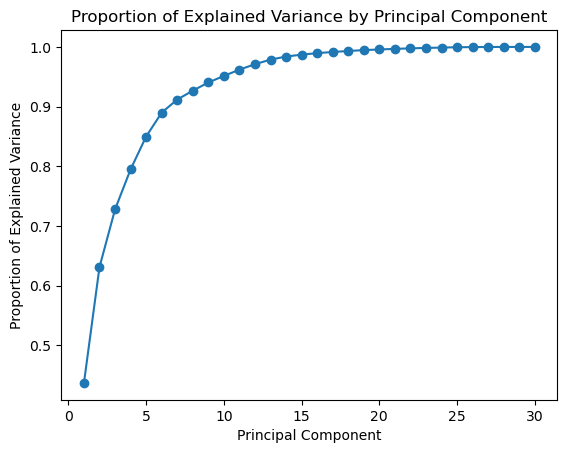

In [24]:
ax = plt.axes()

ax.plot(range(1, 31), proportion_explained, "-o")
ax.set(title="Proportion of Explained Variance by Principal Component", xlabel="Principal Component", ylabel="Proportion of Explained Variance")

[Text(0.5, 1.0, 'Data transformed into first 2 princiap components'),
 Text(0.5, 0, 'PC1'),
 Text(0, 0.5, 'PC2')]

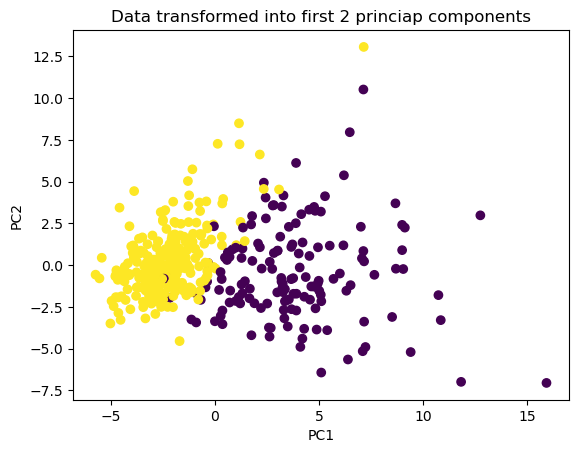

In [25]:
ax = plt.axes()
ax.scatter(pca_transform[:, 0], pca_transform[:, 1], c=y_train)
ax.set(title = "Data transformed into first 2 princiap components", xlabel = "PC1", ylabel = "PC2")

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.svm import SVC

def evaluate_model(model, title=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred));
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"]).plot()
    plt.title(title)

pipe_PCA = Pipeline([("scaling", StandardScaler), ("dim_red", PCA(10)), ("svm", SVC(kernel="rbf"))])

pipe_no_PCA = Pipeline([("scaling", StandardScaler), ("svm", SVC(kernel="rbf"))])

evaluate_model(pipe_PCA)

AttributeError: 'numpy.ndarray' object has no attribute 'fit'